In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

answers = pd.read_csv('answers.csv')
answers.head()
# age categories: Children (0-14), Youth(15-24), Adults(25-64) Seniors(65+)

# use different categorizations here
# top row for csv: "Timestamp","gender","age","importance_enviro","social_usage","importance_connecting","usage_social_enviro","learn_eco_friendly","importance_receive_info","importance_receive_opinions","importance_debates","boolean_share","importance_share_info","attend_event","importance_events_info","importance_local_products","boolean_learn_local_stores","importance_user_rating","suggestions",""


,Timestamp,gender,age,importance_enviro,social_usage,importance_connecting,usage_social_enviro,learn_eco_friendly,importance_receive_info,importance_receive_opinions,importance_debates,boolean_share,importance_share_info,attend_event,importance_events_info,importance_local_products,boolean_learn_local_stores,importance_user_rating,suggestions,Unnamed: 19
0,2022/02/09 12:21:28 AM GMT+1,Male,19.0,6,NaN,9,3,Yes,6,2,3,"Yes, to inpire others.",6,Yes,6,8,Yes,9,NaN,Twitter
1,2022/02/09 1:05:23 PM GMT+1,Female,20.0,7,Instagram;Snapchat,7,3,Yes,6,3,8,No,9,No,7,9,Yes,3,NaN,NaN
2,2022/02/09 1:05:41 PM GMT+1,Female,20.0,8,Facebook;Twitter;Instagram;Snapchat;Tiktok,6,3,Yes,8,6,7,No,5,No,6,6,Yes,5,NaN,NaN
3,2022/02/09 1:05:58 PM GMT+1,Male,22.0,9,Reddit;Option 7;Youtube,2,6,Yes,6,6,5,No,5,Yes,5,3,No,4,NaN,NaN
4,2022/02/09 1:06:33 PM GMT+1,Male,21.0,9,Facebook;Twitter;Instagram;Snapchat;Tiktok,7,4,Yes,7,6,1,No,6,No,6,8,Yes,6,NaN,NaN


In [149]:
from matplotlib.ticker import StrMethodFormatter


def ageCategories(data):
    col = 'age'
    ages = data[col]
    age_scale = [1,2,3,4,5,6,7,8,9,10]
    # age categories: Children (0-14), Youth(15-24), Adults(25-64) Seniors(65+)
    children = ages[ages.between(0.0, 14.0, inclusive=False)]
    youth = ages[ages.between(14.0, 24.0, inclusive=False)]
    adults = ages[ages.between(25.0, 64.0, inclusive=False)]
    seniors = ages[ages.between(65.0, 300.0, inclusive=False)]
    age_values = [children.size, youth.size, adults.size, seniors.size]
    age_labels = ['Children(0-14)','Youth(15-24)','Adults(25-64)','Seniors(65+)']
    plt.pie(age_values, labels=age_labels,colors=['#016937','#1eaf5c','#79ba99','#e7f7f0'])
    plt.legend()
    plt.show()
    ax = data.hist(column=col, color='#016937', rwidth=0.9, grid=False)
    ax = ax[0]
    #https://mode.com/example-gallery/python_histogram/
    for x in ax:
        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel("Age", labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

        x.tick_params(axis='x', rotation=0)

    plt.plot([0,data[col].max()], [data[col].mean(),data[col].mean()], label="Average")
    plt.plot([0,data[col].max()], [data[col].median(),data[col].median()], label="Median")
    plt.plot([0,data[col].max()], [data[col].mode()[0],data[col].mode()[0]], label="Mode")
    plt.plot([0,data[col].max()], [data[col].mean()+data[col].std(),data[col].mean()+data[col].std()], 'r--', label="\u03C3", linewidth=.5)
    plt.plot([0,data[col].max()], [data[col].mean()-data[col].std(),data[col].mean()-data[col].std()], 'r--', linewidth=.5)
    plt.legend()
    plt.show()

In [150]:
def piechart(data, col):
    data[col].value_counts().plot(kind='pie',colors=['#016937','#1eaf5c','#79ba99','#e7f7f0'])
    plt.legend()
    plt.show()

In [151]:
def howImportant(data, col):
    ax = data.hist(column=col, color='#016937', rwidth=0.9, grid=False)
    importance_scale = [0,1,2,3,4,5,6,7,8,9,10,11]
    plt.xticks(importance_scale)
    ax = ax[0]
    #https://mode.com/example-gallery/python_histogram/
    for x in ax:
    # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel("Importance", labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

        x.tick_params(axis='x', rotation=0)

    plt.plot([1,10], [data[col].mean(),data[col].mean()], label="Average")
    plt.plot([1,10], [data[col].median(),data[col].median()], label="Median")
    plt.plot([1,10], [data[col].mode()[0],data[col].mode()[0]], label="Mode")
    plt.plot([1,10], [data[col].mean()+data[col].std(),data[col].mean()+data[col].std()], 'r--', label="\u03C3", linewidth=.5)
    plt.plot([1,10], [data[col].mean()-data[col].std(),data[col].mean()-data[col].std()], 'r--', linewidth=.5)
    plt.legend()
    plt.show()

In [ ]:
def heatmap(data,col1,col2):
    

In [152]:
from wordcloud import WordCloud, STOPWORDS
#source:https://anaconda.org/conda-forge/wordcloud
def wordcloud(data,col):
    df = data
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in df[col]:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [153]:

def visualize(data):
    print('1. What is your gender?')
    piechart(data,'gender')

    print('2. How old are you?')
    ageCategories(data)

    print('Age & Gender distribution')
    heatmap(data,'gender','age')

    print('3. How important is environmentalism to you?')
    howImportant(data,'importance_enviro')

    print('4. Do you use social media and if yes, which ones?')
    #piechart(data,'social_usage')
    wordcloud(data,'social_usage')

    print('5. How important is connecting to other users and friends on social media to you?')
    howImportant(data,'importance_connecting')

    print('6. Do you use social media to connect to the environmentalist movement?')
    howImportant(data,'usage_social_enviro')

    print('7. Would you be interested to learn about new ways to be eco-friendly?')
    piechart(data,'learn_eco_friendly')

    print('8. How important is receiving information about environmentalism to you?')
    howImportant(data,'importance_receive_info')

    print('9. How important is hearing opinions of other internet users about environmentalism to you?')
    howImportant(data,'importance_receive_opinions')

    print('10. How important is having friendly online debates about environmentalism to you?')
    howImportant(data,'importance_debates')

    print('11. Would you be interested to share blog post about your own ways of being eco-friendly?')
    piechart(data,'boolean_share')

    print('12. How important is sharing information and your opinion about environmentalism to you?')
    howImportant(data,'importance_share_info')

    print('13. Did you ever attend a demonstration or speech for the environment (e.g., Fridays for Future)?')
    piechart(data,'attend_event')

    print('14. How interested are you to hear about such activities taking place?')
    howImportant(data,'importance_events_info')

    print('15. How important is it to you to buy local products with a low carbon footprint?')
    howImportant(data,'importance_local_products')

    print('16. Would you like to find out about local stores that sell such products?')
    piechart(data,'boolean_learn_local_stores')

    print('17. How important is being able to rate content on social media (e.g., in form of a like button) to you?')
    howImportant(data,'importance_user_rating')

    print('Do you have any features that you would want to see in an eco-conscious social media platform?')
    wordcloud(data,'suggestions')

1. What is your gender?


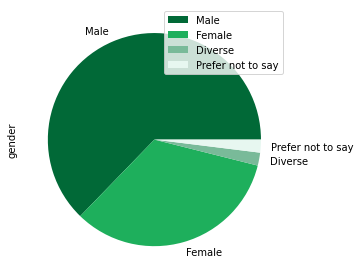

2. How old are you?


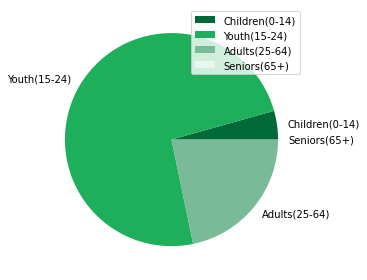

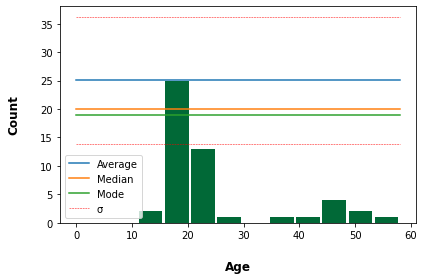

3. How important is environmentalism to you?


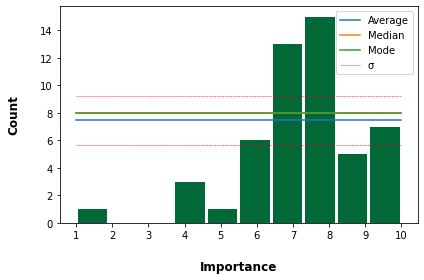

4. Do you use social media and if yes, which ones?


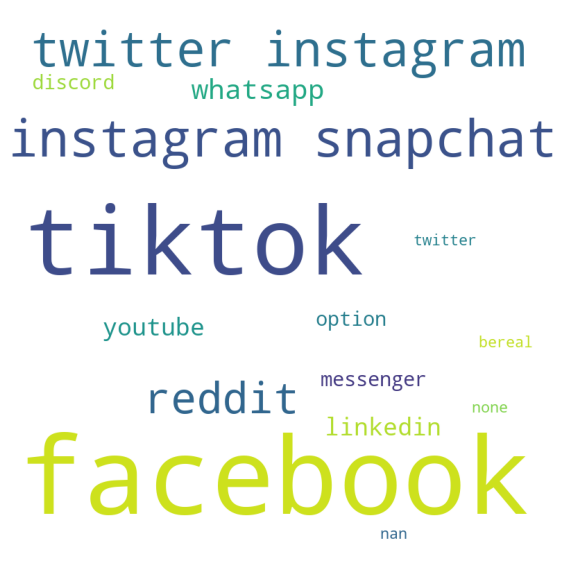

5. How important is connecting to other users and friends on social media to you?


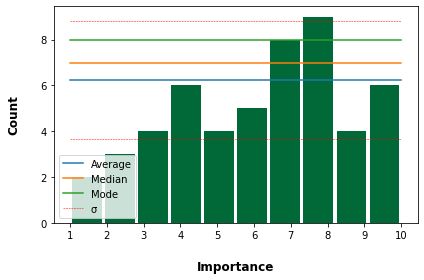

6. Do you use social media to connect to the environmentalist movement?


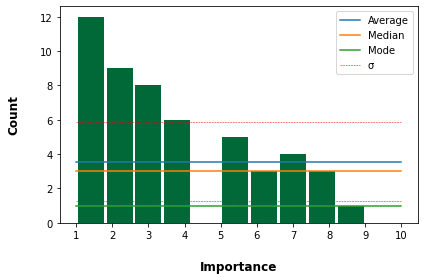

7. Would you be interested to learn about new ways to be eco-friendly?


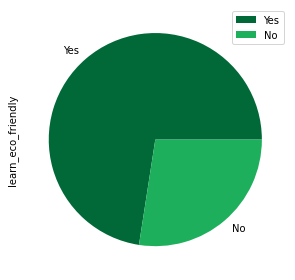

8. How important is receiving information about environmentalism to you?


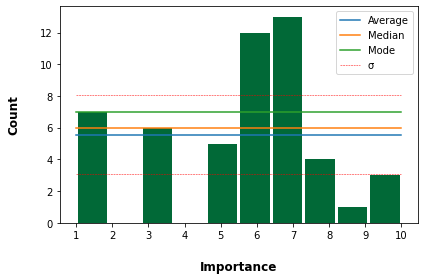

9. How important is hearing opinions of other internet users about environmentalism to you?


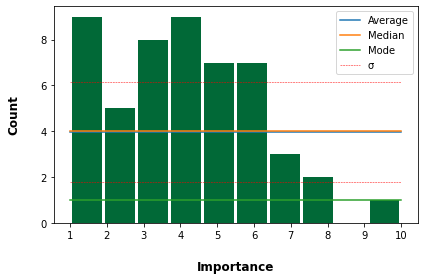

10. How important is having friendly online debates about environmentalism to you?


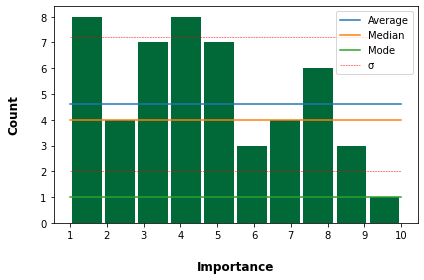

11. Would you be interested to share blog post about your own ways of being eco-friendly?


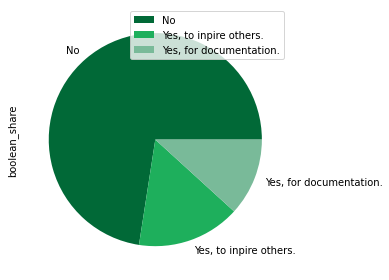

12. How important is sharing information and your opinion about environmentalism to you?


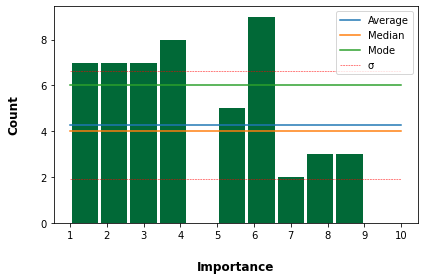

13. Did you ever attend a demonstration or speech for the environment (e.g., Fridays for Future)?


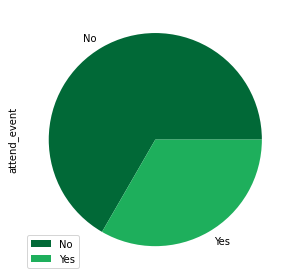

14. How interested are you to hear about such activities taking place?


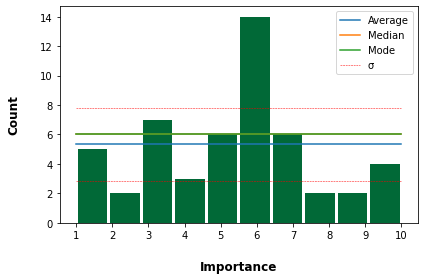

15. How important is it to you to buy local products with a low carbon footprint?


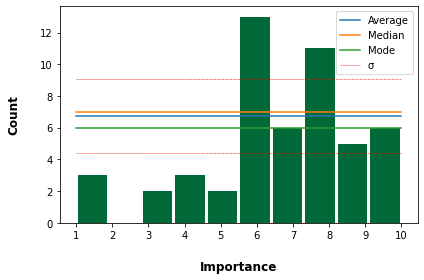

16. Would you like to find out about local stores that sell such products?


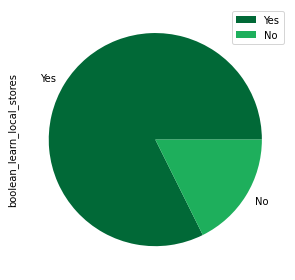

17. How important is being able to rate content on social media (e.g., in form of a like button) to you?


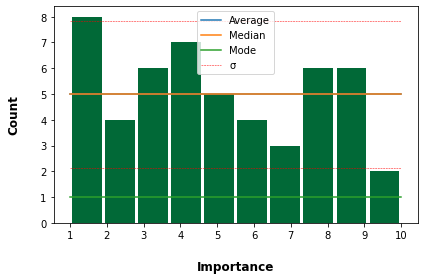

Do you have any features that you would want to see in an eco-conscious social media platform?


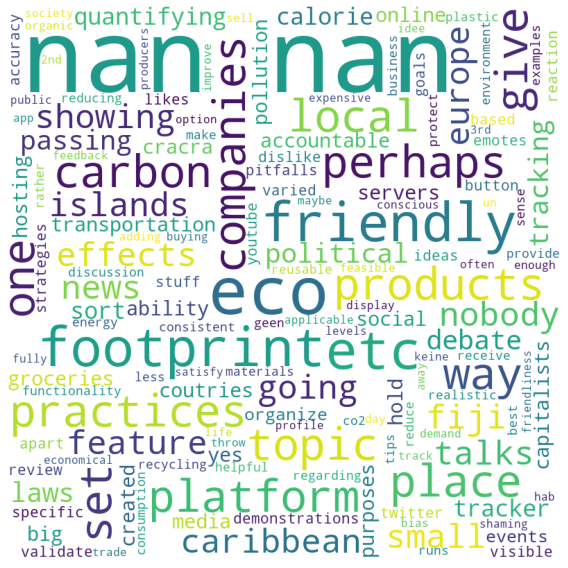

In [154]:
visualize(answers)